In [959]:
# This piece of code blocks the warning messages
import warnings 
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns;sns.set()
from scipy import stats
from scipy.stats import norm, skew #for some statistics

# inline 그림 출력
%matplotlib inline
# 그래프 ggplot 스타일 사용
plt.style.use('ggplot')
# 한글출력
mpl.rc('font', family='D2Coding')
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

print('Python version ' + sys.version)
print('Numpy version ' + np.__version__)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + mpl.__version__ )
print('Missingno version ' + msno.__version__)
print('seaborn version ' + sns.__version__)

Python version 3.6.5 |Anaconda, Inc.| (default, Mar 29 2018, 13:32:41) [MSC v.1900 64 bit (AMD64)]
Numpy version 1.14.3
Pandas version 0.23.0
Matplotlib version 2.2.2
Missingno version 0.4.1
seaborn version 0.8.1


In [960]:
train = pd.read_csv('train.csv', parse_dates=["SalePrice"])
test = pd.read_csv('test.csv')
house = train.copy()

In [961]:
train.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [962]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


### Handling Missgin Data - Mediaum 

 https://medium.com/@numanyilmaz61/handling-missing-data-93d3ce5d0161  
 https://medium.com/ibm-data-science-experience/missing-data-conundrum-exploration-and-imputation-techniques-9f40abe0fd87


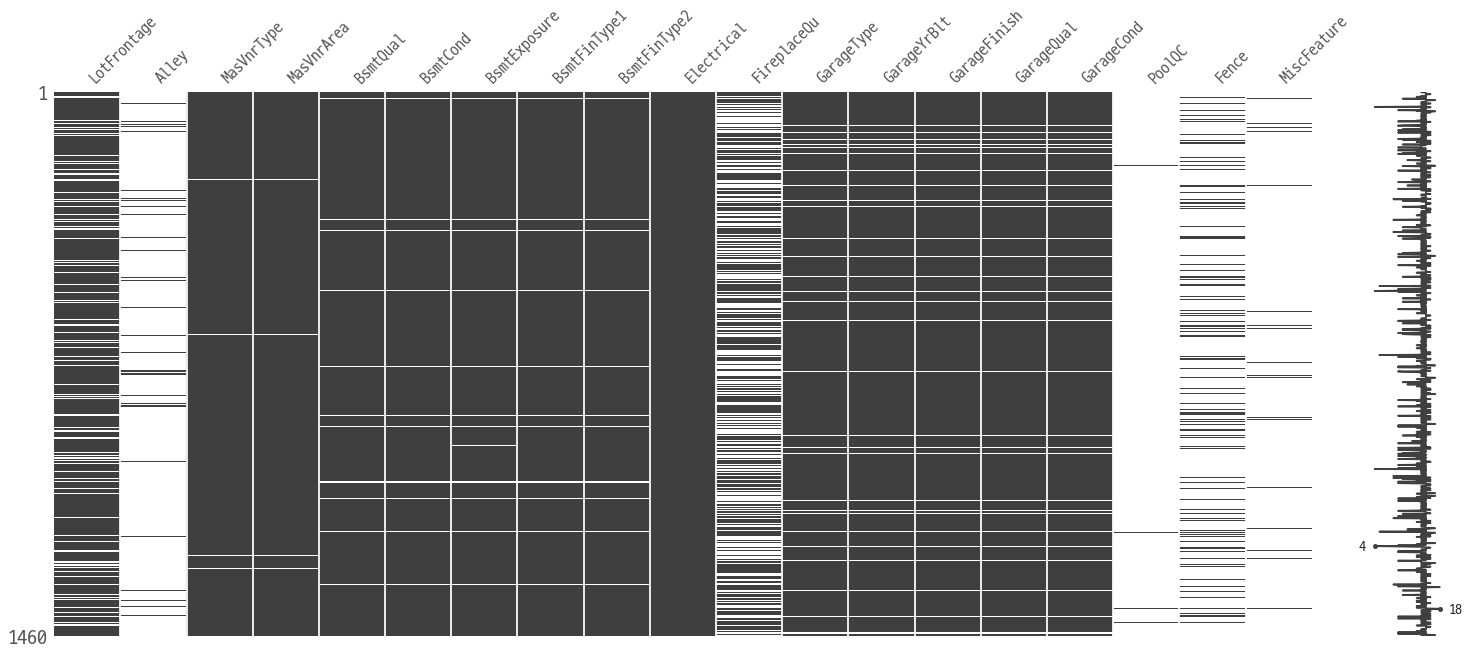

In [963]:
# !pip install missingno
# import missingno as msno

# 
# msno.matrix(house, figsize=(12,8))
missingdata_train = train.columns[train.isnull().any()].tolist()
msno.matrix(train[missingdata_train])

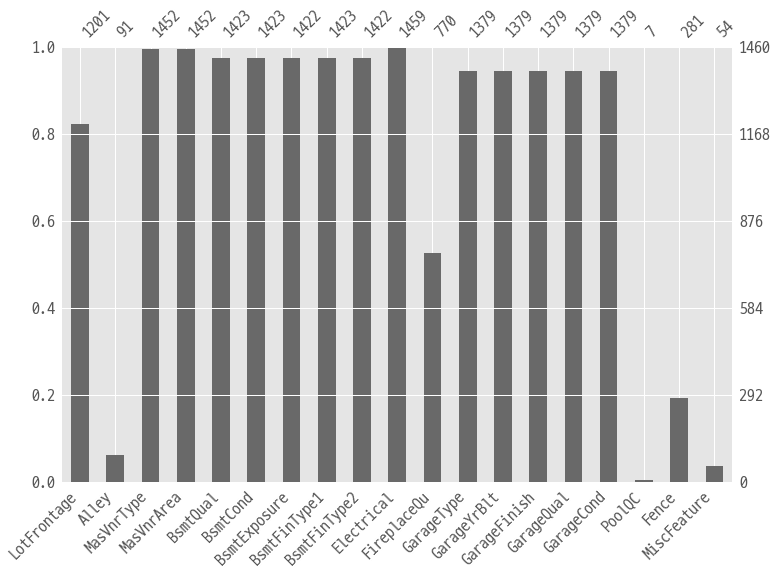

In [964]:
msno.bar(train[missingdata_train],  figsize=(12,8))

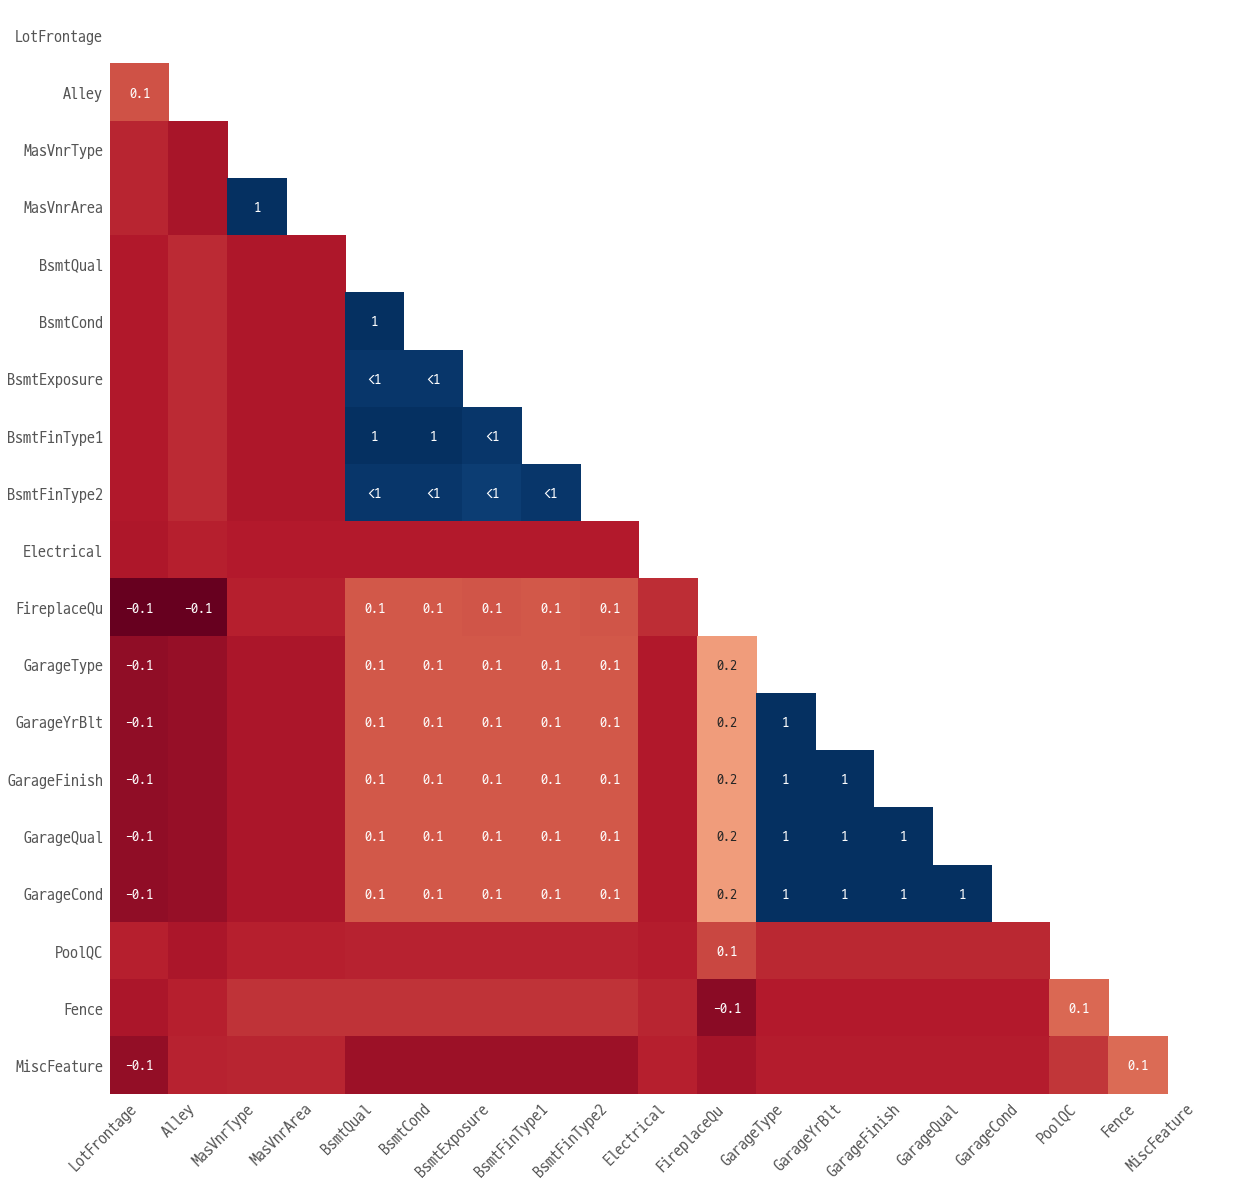

In [965]:
msno.heatmap(train[missingdata_train], figsize=(20,20)) 
#  nullity correlation~~
# -0.05 < R < 0.05, no value will be displayed.
# R=1, 1개의 feature가 missing이면 다른 하나의 feature도 missing.
# R=-1, 1개의 feature가 missing이면 다른 하나는 not missing.

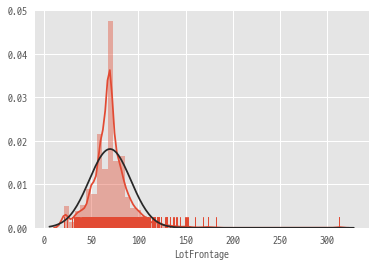

In [966]:
# LotFrontAge - linear feet of street connected to property, Ordinal 
#  NA(259, 17%) --> '0' or median
## replace -> 0
# train["LotFrontage"].fillna(value=0, inplace=True)  # 
## replace -> median
train["LotFrontage"].fillna(train["LotFrontage"].median(), inplace=True)  # 
test["LotFrontage"].fillna(test["LotFrontage"].median(), inplace=True)  # 
sns.distplot(train["LotFrontage"],fit=norm,rug=True)


In [967]:
# Alley - Type of alley access to property , category
# NA(NaN, 1369) -> 'None'

train["Alley"].fillna(value='None', inplace=True)
test["Alley"].fillna(value='None', inplace=True)


In [968]:
# PoolQC - NA(1453), Category, 
#house["PoolQC"] = train["PoolQC"]

#house_poolqc_encoded, house_poolqc_categories = house["PoolQC"].factorize()

# 방법1.  Index(['None', 'Ex', 'Fa', 'Gd'], dtype='object')
#train["PoolQC"].fillna(value='None', inplace=True)
#train["PoolQC"].value_counts()
#poolCate=['None', 'Ex', 'Fa', 'Gd'] # 1453, 3, 2, 2
# sns.countplot(x="PoolQC", data=train)

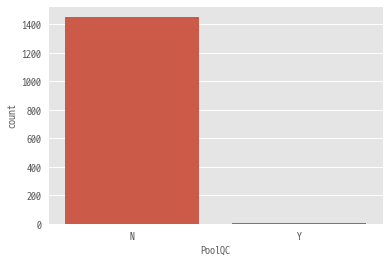

In [969]:
## 방법2. NA - N, others - Y
#train["PoolQC"] = train["PoolQC"]
train["PoolQC"].fillna(value='N', inplace=True)
train["PoolQC"].loc[train["PoolQC"] == 'Gd']='Y'
train["PoolQC"].loc[train["PoolQC"] == 'Fa']='Y'
train["PoolQC"].loc[train["PoolQC"] == 'Ex']='Y'

# train["PoolQC"].value_counts() # 1453, 7
sns.countplot(x="PoolQC", data=train)


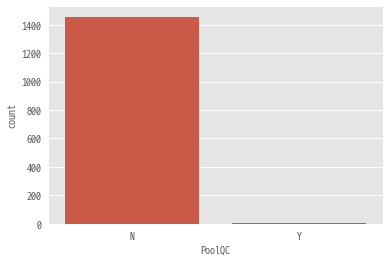

In [970]:
test["PoolQC"].fillna(value='N', inplace=True)
test["PoolQC"].loc[test["PoolQC"] == 'Gd']='Y'
test["PoolQC"].loc[test["PoolQC"] == 'Fa']='Y'
test["PoolQC"].loc[test["PoolQC"] == 'Ex']='Y'

sns.countplot(x="PoolQC", data=test)

In [971]:
# FireplaceQu(Fireplace quality): 
# 방법1, 690 NA --> 'None' 
# category data 
train["FireplaceQu"].fillna(value='None', inplace=True)
test["FireplaceQu"].fillna(value='None', inplace=True)
# train["FireplaceQu"].value_counts()
#cate=['None', 'Gd', 'TA','Fa','Ex','Po'] # 690,380,313,33,24,20
#plt.bar(cate, (house["FireplaceQu"].value_counts()),align='center', alpha=0.5)
# sns.countplot(x="FireplaceQu", data=train)

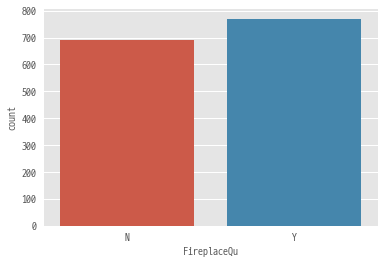

In [972]:
# 방법2, 690 NA --> 'N','Y' 
# Yes/No - Dichotomous variable
train["FireplaceQu"].loc[train["FireplaceQu"] == 'None']='N'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Gd']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'TA']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Fa']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Ex']='Y'
train["FireplaceQu"].loc[train["FireplaceQu"] == 'Po']='Y'
#house["FireplaceQu"].value_counts()
sns.countplot(x="FireplaceQu", data=train)

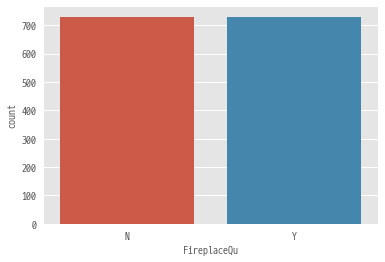

In [973]:
# 방법2, 690 NA --> 'N','Y' 
# Yes/No - Dichotomous variable
test["FireplaceQu"].loc[test["FireplaceQu"] == 'None']='N'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Gd']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'TA']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Fa']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Ex']='Y'
test["FireplaceQu"].loc[test["FireplaceQu"] == 'Po']='Y'
#house["FireplaceQu"].value_counts()
sns.countplot(x="FireplaceQu", data=test)

## Bsmt* 에 대한 NaN 처리 - train

In [974]:
# attributes=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
#house["BsmtQual"].isnull().sum()
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========>train= %5d, test=%5d' %(train[col].isnull().sum(), test[col].isnull().sum()))
# NaN --> 최빈값으로 교체 

BsmtQual             ========>train=    37, test=   44
BsmtCond             ========>train=    37, test=   45
BsmtExposure         ========>train=    38, test=   44
BsmtFinType1         ========>train=    37, test=   42
BsmtFinType2         ========>train=    38, test=   42


In [975]:
#ID = 
#attributes=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
# & (house["BsmtExposure"].notnull())==False, ["BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]
bsmtExpo= train.loc[(train["BsmtExposure"].isnull())==True,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]] 
bsmtExpo

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
17,NaN,NaN,NaN,NaN,0,NaN
39,NaN,NaN,NaN,NaN,0,NaN
90,NaN,NaN,NaN,NaN,0,NaN
102,NaN,NaN,NaN,NaN,0,NaN
156,NaN,NaN,NaN,NaN,0,NaN
182,NaN,NaN,NaN,NaN,0,NaN
259,NaN,NaN,NaN,NaN,0,NaN
342,NaN,NaN,NaN,NaN,0,NaN
362,NaN,NaN,NaN,NaN,0,NaN
371,NaN,NaN,NaN,NaN,0,NaN


#### train set: BsmtExposure, BsmtFinType2가 각각 NaN이 하나더 많다.

In [976]:
train["BsmtExposure"].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [977]:
# BsmtExposure 의 Nan -- > No
train.loc[948,"BsmtExposure"]="No"
train.loc[948,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]]

BsmtQual         Gd
BsmtCond         TA
BsmtExposure     No
BsmtFinType1    Unf
BsmtFinType2    Unf
Name: 948, dtype: object

In [978]:
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========> %5d' %(train[col].isnull().sum()))

BsmtQual             ========>    37
BsmtCond             ========>    37
BsmtExposure         ========>    37
BsmtFinType1         ========>    37
BsmtFinType2         ========>    38


#### BsmtFinType2가 각각 NaN이 하나더 많다.¶

In [979]:
bsmtExpo= train.loc[(train["BsmtFinType2"].isnull())==True,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2"]] 
bsmtExpo

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
17,NaN,NaN,NaN,NaN,0,NaN,0
39,NaN,NaN,NaN,NaN,0,NaN,0
90,NaN,NaN,NaN,NaN,0,NaN,0
102,NaN,NaN,NaN,NaN,0,NaN,0
156,NaN,NaN,NaN,NaN,0,NaN,0
182,NaN,NaN,NaN,NaN,0,NaN,0
259,NaN,NaN,NaN,NaN,0,NaN,0
332,Gd,TA,No,GLQ,1124,NaN,479
342,NaN,NaN,NaN,NaN,0,NaN,0
362,NaN,NaN,NaN,NaN,0,NaN,0


In [980]:
# ID=332, BsmtFinType2 NA(=NaN) 인데 BsmtFinSF2: Type 2 finished square feet에 값이 있으므로 --> 평균적인 값으로 대체

train.loc[332,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2"]]

BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinType2     NaN
BsmtFinSF2       479
Name: 332, dtype: object

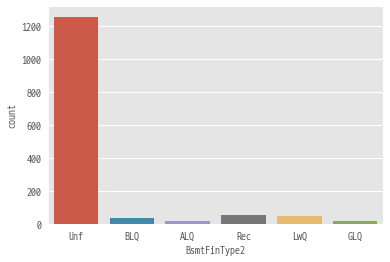

In [981]:
# BsmtFinType2 의 NaN을 대체하기 위해 각 카테고리 분포 확인, 가장 많은 카테고리로 변경
#cate=['GLQ', 'ALQ','BLQ','Rec','LwQ','Unf'] # 
#plt.bar(cate, (house["BsmtFinType2"].value_counts()),align='center', alpha=0.5)
sns.countplot(x="BsmtFinType2", data=train)

In [982]:
# NaN --> Unf
train.loc[332,"BsmtFinType2"]="Unf"
train.loc[332,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2","BsmtFinSF2"]]


BsmtQual          Gd
BsmtCond          TA
BsmtExposure      No
BsmtFinType1     GLQ
BsmtFinSF1      1124
BsmtFinType2     Unf
BsmtFinSF2       479
Name: 332, dtype: object

In [983]:
# NaN이 추가로 많은 feature 처리 완료
train["BsmtFinType2"].isnull().sum()

37

In [984]:
# 다음 attributes에 대한 37개 NaN은 --> None 
attributes=["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"]
for col in attributes:
    train[col].fillna(value='None', inplace=True)

## test set 

In [985]:
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========>train= %5d, test=%5d' %(train[col].isnull().sum(), test[col].isnull().sum()))
# NaN --> 최빈값으로 교체 

BsmtQual             ========>train=     0, test=   44
BsmtCond             ========>train=     0, test=   45
BsmtExposure         ========>train=     0, test=   44
BsmtFinType1         ========>train=     0, test=   42
BsmtFinType2         ========>train=     0, test=   42


In [986]:
bsmtExpo2= test.loc[(test["BsmtCond"].isnull())==True,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]] 
bsmtExpo2

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
125,NaN,NaN,NaN,NaN,0.0,NaN
133,NaN,NaN,NaN,NaN,0.0,NaN
269,NaN,NaN,NaN,NaN,0.0,NaN
318,NaN,NaN,NaN,NaN,0.0,NaN
354,NaN,NaN,NaN,NaN,0.0,NaN
387,NaN,NaN,NaN,NaN,0.0,NaN
388,NaN,NaN,NaN,NaN,0.0,NaN
396,NaN,NaN,NaN,NaN,0.0,NaN
397,NaN,NaN,NaN,NaN,0.0,NaN
398,NaN,NaN,NaN,NaN,0.0,NaN


In [987]:
# "BsmtCond" 
test["BsmtCond"].value_counts()

TA    1295
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [988]:
test.loc[[580,725,1064],"BsmtCond"]="TA"
test["BsmtCond"].value_counts()

TA    1298
Fa      59
Gd      57
Po       3
Name: BsmtCond, dtype: int64

In [989]:
bsmtExpo3= test.loc[(test["BsmtQual"].isnull())==True,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]] 
bsmtExpo3

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
125,NaN,NaN,NaN,NaN,0.0,NaN
133,NaN,NaN,NaN,NaN,0.0,NaN
269,NaN,NaN,NaN,NaN,0.0,NaN
318,NaN,NaN,NaN,NaN,0.0,NaN
354,NaN,NaN,NaN,NaN,0.0,NaN
387,NaN,NaN,NaN,NaN,0.0,NaN
388,NaN,NaN,NaN,NaN,0.0,NaN
396,NaN,NaN,NaN,NaN,0.0,NaN
397,NaN,NaN,NaN,NaN,0.0,NaN
398,NaN,NaN,NaN,NaN,0.0,NaN


In [990]:
### 757, 758 NaN --> 최빈값 

In [991]:
# "BsmtQual" 
test["BsmtQual"].value_counts()

TA    634
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [992]:
test.loc[[757,758],"BsmtQual"]="TA"
test["BsmtQual"].value_counts()

TA    636
Gd    591
Ex    137
Fa     53
Name: BsmtQual, dtype: int64

In [993]:
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========>train= %5d, test=%5d' %(train[col].isnull().sum(), test[col].isnull().sum()))

BsmtQual             ========>train=     0, test=   42
BsmtCond             ========>train=     0, test=   42
BsmtExposure         ========>train=     0, test=   44
BsmtFinType1         ========>train=     0, test=   42
BsmtFinType2         ========>train=     0, test=   42


In [994]:
bsmtExpo4= test.loc[(test["BsmtExposure"].isnull())==True,["BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinSF1","BsmtFinType2"]] 
bsmtExpo4

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2
27,Gd,TA,NaN,Unf,0.0,Unf
125,NaN,NaN,NaN,NaN,0.0,NaN
133,NaN,NaN,NaN,NaN,0.0,NaN
269,NaN,NaN,NaN,NaN,0.0,NaN
318,NaN,NaN,NaN,NaN,0.0,NaN
354,NaN,NaN,NaN,NaN,0.0,NaN
387,NaN,NaN,NaN,NaN,0.0,NaN
388,NaN,NaN,NaN,NaN,0.0,NaN
396,NaN,NaN,NaN,NaN,0.0,NaN
397,NaN,NaN,NaN,NaN,0.0,NaN


### 27, 888

In [995]:
# "BsmtExposure" 
test["BsmtExposure"].value_counts()

No    951
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [996]:
test.loc[[27,888],"BsmtExposure"]="No"
test["BsmtExposure"].value_counts()

No    953
Av    197
Gd    142
Mn    125
Name: BsmtExposure, dtype: int64

In [997]:
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    print(f'{col:20} ========>train= %5d, test=%5d' %(train[col].isnull().sum(), test[col].isnull().sum()))

BsmtQual             ========>train=     0, test=   42
BsmtCond             ========>train=     0, test=   42
BsmtExposure         ========>train=     0, test=   42
BsmtFinType1         ========>train=     0, test=   42
BsmtFinType2         ========>train=     0, test=   42


In [998]:
# 다음 attributes에 대한 42개 NaN은 --> None 
for col in ("BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2"):
    test[col].fillna(value='None', inplace=True)

In [999]:
# 'GarageQual','GarageCond' 속성  NA(=NaN)  --> No Garage  --> None 
# GarageYrBlt 속성  NA(=NaN)  --> ???
# GarageFinish 속성  NA(=NaN) --> 'None' 
# GarageCars 속성  NA(=NaN) --> 0
# GarageArea 속성  NA(=NaN)--> 0
# ['GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond']
attributes=['GarageType','GarageFinish','GarageQual','GarageCond']
for col in attributes:
    train[col].fillna(value='None', inplace=True)
    test[col].fillna(value='None', inplace=True)

attributes=['GarageCars','GarageArea']
for col in attributes:
    train[col].fillna(value=0, inplace=True)    
    test[col].fillna(value=0, inplace=True)    

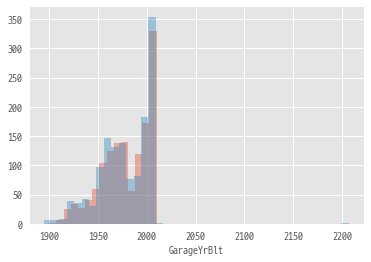

In [1000]:
#sns.distplot(house["GarageYrBlt"])
sns.distplot(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False)
sns.distplot(test.loc[test["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False)
#sns.countplot(x="GarageYrBlt",data=house)

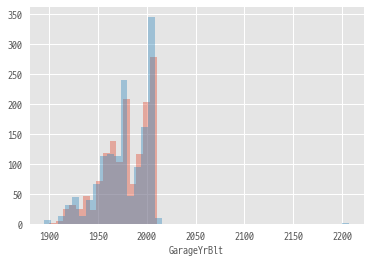

In [1001]:
# GarageYrBlt를 어떻게????  
# 방법1. median
train["GarageYrBlt"].fillna(train["GarageYrBlt"].median(), inplace=True)
test["GarageYrBlt"].fillna(test["GarageYrBlt"].median(), inplace=True)
sns.distplot(train.loc[train["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False)
sns.distplot(test.loc[test["GarageYrBlt"].notnull(), "GarageYrBlt"], kde=False)

In [1002]:
# Fence, NA(1179) - No Fence,
# house["Fence"].value_counts()
train["Fence"].fillna(value='None', inplace=True)
test["Fence"].fillna(value='None', inplace=True)

In [1003]:
# MiscFeature, NA(1406) - None ,
train["MiscFeature"].fillna(value='None', inplace=True)
test["MiscFeature"].fillna(value='None', inplace=True)

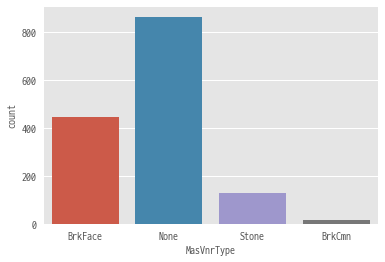

In [1004]:
#house["MasVnrType"].isnull().sum() # Category, NA - 8개, --> 최빈값 'None'
train["MasVnrArea"].isnull().sum() # Nominal,  NA - 8, --> 0
sns.countplot(x="MasVnrType", data=train)

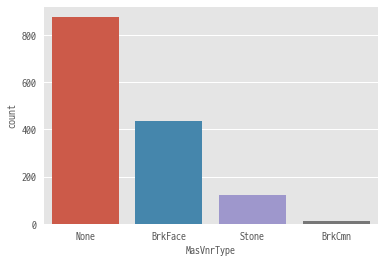

In [1005]:
test["MasVnrArea"].isnull().sum() # Nominal,  NA --> 0, category --> 최빈값 'None'
sns.countplot(x="MasVnrType", data=test)

In [1006]:
# MasVnrType
train["MasVnrType"].fillna(value='None', inplace=True)
test["MasVnrType"].fillna(value='None', inplace=True)
# MasVnrArea
train["MasVnrArea"].fillna(value=0, inplace=True)    
test["MasVnrArea"].fillna(value=0, inplace=True)    

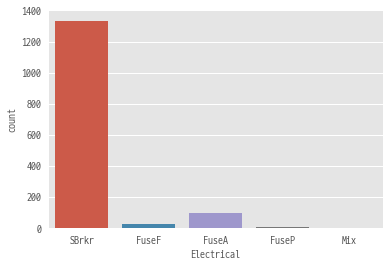

In [1007]:
# Electrical, category, NA - 1개,  NA --> 최빈값 'SBrkr'
# house["Electrical"].isnull().sum() # 1개
sns.countplot(x="Electrical", data=train)
train["Electrical"].fillna(value='SBrkr', inplace=True)  

## Train에 대한 처리는 끝, Test에 남아 있는 나머지 features 설정

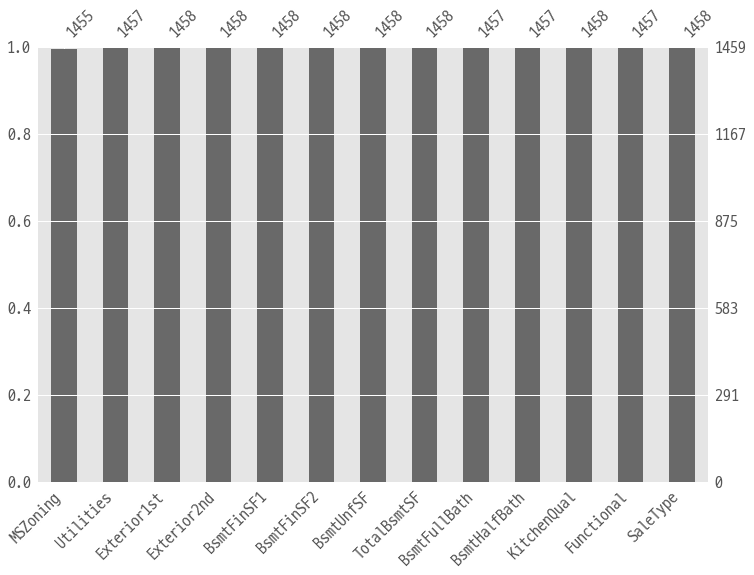

In [1008]:
missingdata_test = test.columns[test.isnull().any()].tolist()
#msno.matrix(test[missingdata_test])
msno.bar(test[missingdata_test],  figsize=(12,8))

In [1009]:
# Category, NaN =>  최빈값으로 대체, Nominal ==> 0 또는 median
# attributes=['MSZoning','Utilities','Exterior1st','Exterior2nd','KitchenQual','Functional','SaleType']

test["MSZoning"].value_counts() # MSZoning : NA -> RL
test["MSZoning"].fillna(value='RL', inplace=True)

In [1010]:
test["Utilities"].value_counts() # Utilities : NA -> AllPub
test["Utilities"].fillna(value='AllPub', inplace=True)

In [1011]:
test["Exterior1st"].value_counts() # Exterior1st : NA -> VinylSd
test["Exterior1st"].fillna(value='VinylSd', inplace=True)

In [1012]:
test["Exterior2nd"].value_counts() # Exterior2nd : NA -> VinylSd
test["Exterior2nd"].fillna(value='VinylSd', inplace=True)

In [1013]:
test["KitchenQual"].value_counts() # KitchenQual : NA -> TA
test["KitchenQual"].fillna(value='TA', inplace=True)

In [1014]:
test["Functional"].value_counts() # Functional : NA -> Typ
test["Functional"].fillna(value='Typ', inplace=True)

In [1015]:
test["SaleType"].value_counts() # SaleType : NA -> WD
test["SaleType"].fillna(value='WD', inplace=True)

In [1016]:
# Nominal feature
attributes = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']
for col in attributes:
    test[col].fillna(test[col].median(), inplace=True)

## NaN(NA)정리 완료

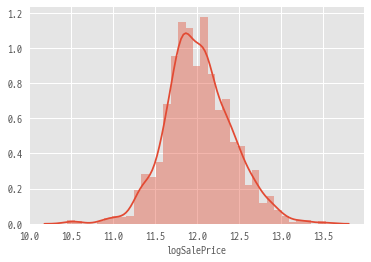

In [1017]:
# SalePrice object -> int    
train['logSalePrice']=np.log1p(train['SalePrice'].astype("float64"));
#house.info()
sns.distplot(train['logSalePrice'])

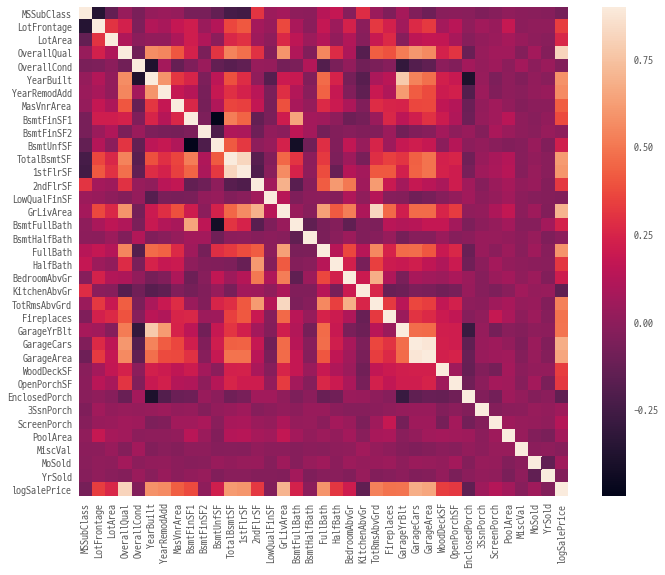

In [1018]:
# house.drop(["inySalePrice"], axis=1, inplace=True)
corrmat = train.iloc[:,1:].corr(method="pearson")
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

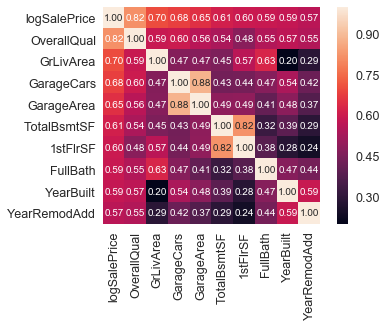

In [1019]:
cols = corrmat.nlargest(10, 'logSalePrice')['logSalePrice'].index
#house2 = house.drop(['intSalePrice'], axis=1)
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1020]:
# category 데이터와 numeric 데이터 찾기

# train
types_train = train.dtypes
num_train = types_train[(types_train == 'int64') | (types_train == 'float64')] 
#num_train.shape
cat_train = types_train[types_train == 'object'] 
#cat_train.shape
cat_train_list=list(cat_train.index)
# test
types_test = test.dtypes
num_test = types_test[(types_test == 'int64') | (types_test == 'float64')]
cat_test = types_test[types_test == 'object']
cat_test_list=list(cat_test.index)

In [1021]:
print(cat_test_list)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [1022]:
# convert categorical data to numerical data

for col in cat_train_list:
    cat_train_encoded,cat_train_cats = train[col].factorize()
    train[col] = cat_train_encoded
    
for col in cat_test_list:
    cat_test_encoded, cat_test_cats = test[col].factorize()
    test[col] = cat_test_encoded
    

In [1023]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,logSalePrice
0,1,60,0,65.0,8450,0,0,0,0,0,...,0,0,0,0,2,2008,0,0,0,12.247699
1,2,20,0,80.0,9600,0,0,0,0,0,...,0,0,0,0,5,2007,0,0,1,12.109016
2,3,60,0,68.0,11250,0,0,1,0,0,...,0,0,0,0,9,2008,0,0,2,12.317171
3,4,70,0,60.0,9550,0,0,1,0,0,...,0,0,0,0,2,2006,0,1,3,11.849405
4,5,60,0,84.0,14260,0,0,1,0,0,...,0,0,0,0,12,2008,0,0,4,12.429220


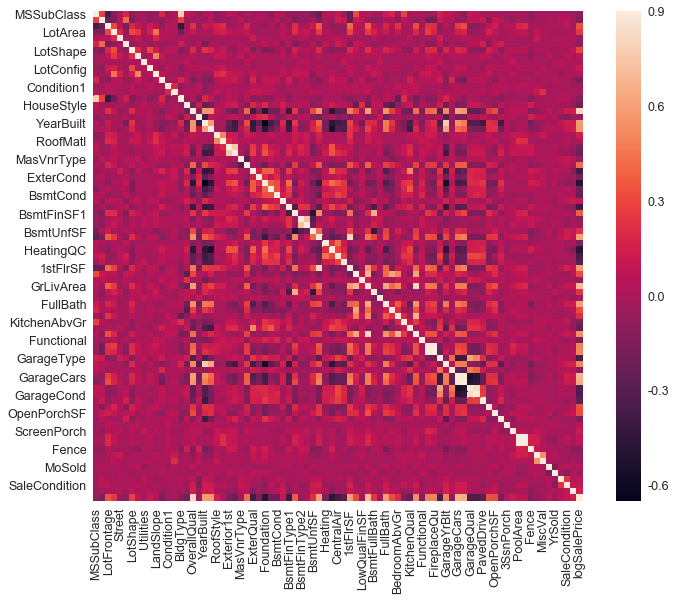

In [1024]:
corrmat = train.iloc[:,1:].corr(method="pearson")
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

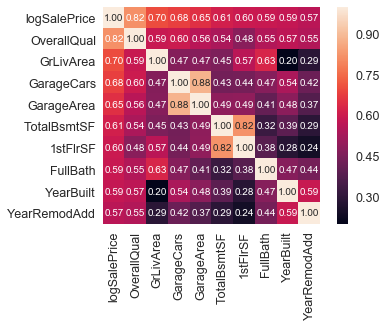

In [1025]:
cols = corrmat.nlargest(10, 'logSalePrice')['logSalePrice'].index
#house2 = house.drop(['intSalePrice'], axis=1)
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [1026]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,0,80.0,11622,0,0,0,0,0,...,120,0,0,0,0,0,6,2010,0,0
1,1462,20,1,81.0,14267,0,0,1,0,0,...,0,0,0,1,1,12500,6,2010,0,0
2,1463,60,1,74.0,13830,0,0,1,0,0,...,0,0,0,0,0,0,3,2010,0,0
3,1464,60,1,78.0,9978,0,0,1,0,0,...,0,0,0,1,0,0,6,2010,0,0
4,1465,120,1,43.0,5005,0,0,1,1,0,...,144,0,0,1,0,0,1,2010,0,0


## testing model

1. train 데이터셋을 2개로 분리하여 train/validation data set을 만든다.
2. train/validation data set으로 모델을 만들고 검증한다.
3. test 셋에 적용하여 Prediction한다.



우선
- train 데이터셋에서 Id, SalePrice, logSalePrice를 drop 시키고 --> X_train
- logSalePrice                                                 --> Y_train
- test 데이터셋에서 Id를 drop 시키고 X_test로 생성하여 SalePrice를 예측하는 것


In [1027]:
# creating train & test data set

X_train = train.drop(["Id","SalePrice","logSalePrice"], axis=1).values
y_train = train["logSalePrice"].values
X_test = test.drop("Id", axis=1).values


In [1028]:
# creating train/validation data set
from sklearn.model_selection import train_test_split

X_training, X_valid, y_training, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### Linear Regression

In [1029]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

lin_reg =LinearRegression()
lin_reg.fit(X_training, y_training)
lin_reg.intercept_, lin_reg.coef_

(11.229702014675313,
 array([-1.13588757e-04, -2.57887010e-03, -2.01475517e-04,  9.77550900e-07,
        -3.62267491e-02,  1.37912724e-02,  3.89138494e-03,  1.84735172e-02,
        -1.68584314e-01,  7.66955459e-03,  3.69902350e-02, -1.35715955e-03,
        -8.16489607e-03, -4.41324641e-02, -2.22231295e-02, -1.99873242e-03,
         7.11120480e-02,  3.28283483e-02,  2.32070867e-03,  1.50782329e-03,
         2.55127513e-02, -4.71462692e-02, -2.98231193e-03,  5.00674212e-03,
         7.66205021e-03, -1.11157814e-05, -9.65538238e-03, -2.32252895e-03,
        -1.72035779e-02,  7.98891409e-03, -1.74705803e-02,  6.79401221e-03,
        -3.36334493e-03,  2.27690753e-05, -4.85670133e-04,  2.72751197e-05,
        -8.74586898e-06,  4.12983305e-05, -1.97105055e-03, -1.35129280e-02,
        -5.76515845e-02,  9.66357960e-03,  5.24431877e-05, -3.35551665e-07,
         1.40404593e-04,  1.92512223e-04,  5.74341444e-02,  2.60984004e-02,
         4.78682468e-02,  2.51538745e-02, -1.34101931e-03, -4.66904

In [1058]:
y_valid_pred=lin_reg.predict(X_valid)
r2_lin = r2_score(y_valid, y_valid_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, y_valid_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.8760730745869677
RMSE Score: 0.15207276568842


In [1059]:
# 교차 검증(K-fold cross validation test)
from sklearn.model_selection import cross_val_score

score = cross_val_score(lin_reg, X_valid, y_valid, cv=10, scoring="r2")
print("Cross Validation score: " + str(np.mean(score)))  # max_score = 4, 0.85999

Cross Validation score: 0.832946885077112


#### LinearRegression에 대한 GridSearchCV를 이용한 최적의 parameter 찾기

In [1060]:
# GridSearchCV를 이용한 최적의 parameter 찾기

from sklearn.model_selection import GridSearchCV

lin_reg_grid = LinearRegression()
parameters_lin = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False]}
grid_linreg = GridSearchCV(lin_reg_grid, parameters_lin, verbose=1 , scoring = "r2")
grid_linreg.fit(X_training, y_training)

print("Best LinReg Model: " + str(grid_linreg.best_estimator_))
print("Best Score: " + str(grid_linreg.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best LinReg Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
Best Score: 0.8201780063990857


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.0s finished


In [1061]:
lin_reg_best = grid_linreg.best_estimator_
lin_reg_best.fit(X_training, y_training)
lin_pred = lin_reg_best.predict(X_valid)
r2_lin = r2_score(y_valid, lin_pred)
rmse_lin = np.sqrt(mean_squared_error(y_valid, lin_pred))
print("R^2 Score: " + str(r2_lin))
print("RMSE Score: " + str(rmse_lin))

R^2 Score: 0.8760730745869677
RMSE Score: 0.15207276568842


In [1063]:
scores_lin = cross_val_score(lin_reg_best, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.8021584436764343


###  Ridge Model

In [1064]:
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters_ridge = {"alpha":[0.001, 0.01, 0.1, 1], "fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_ridge.best_estimator_))
print("Best Score: " + str(grid_ridge.best_score_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Ridge Model: Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)
Best Score: 0.836996827205037


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    0.2s finished


In [1065]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_training, y_training)
ridge_pred = ridge.predict(X_valid)
r2_ridge = r2_score(y_valid, ridge_pred)
rmse_ridge = np.sqrt(mean_squared_error(y_valid, ridge_pred))
print("R^2 Score: " + str(r2_ridge))
print("RMSE Score: " + str(rmse_ridge))

R^2 Score: 0.8745558329570474
RMSE Score: 0.15300084975127737


In [1066]:
scores_lin = cross_val_score(ridge, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lin)))

Cross Validation Score: 0.8295969510624234


### Lasso Model

In [1067]:
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters_lasso = {"alpha":[0.001, 0.01, 0.1, 1], "fit_intercept":[True, False], "normalize":[True, False], "copy_X":[True, False]}

grid_lasso = GridSearchCV(lasso, parameters_lasso, verbose=1, scoring="r2")
grid_lasso.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_lasso.best_estimator_))
print("Best Score: " + str(grid_lasso.best_score_))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Ridge Model: Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Best Score: 0.8324247924161834


[Parallel(n_jobs=1)]: Done  96 out of  96 | elapsed:    2.6s finished


In [1068]:
lasso = grid_lasso.best_estimator_
lasso.fit(X_training, y_training)
lasso_pred = lasso.predict(X_valid)
r2_lasso = r2_score(y_valid, lasso_pred)
rmse_lasso = np.sqrt(mean_squared_error(y_valid, lasso_pred))
print("R^2 Score: " + str(r2_lasso))
print("RMSE Score: " + str(rmse_lasso))

R^2 Score: 0.8729469529163557
RMSE Score: 0.1539788775109352


In [1069]:
scores_lasso = cross_val_score(lasso, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_lasso)))

Cross Validation Score: 0.8246773409811545


### Decision Tree Regressor Model

In [1070]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

parameters_dtr = {"criterion":["mse","mae","friedman_mse"], "splitter":["best","random"], "max_depth":[3, 5, 7, 9], "max_features":["auto","sqrt","log2"],
                 "min_samples_split":[2, 3, 5, 10]}

grid_dtr = GridSearchCV(dtr, parameters_dtr, verbose=1, scoring="r2")
grid_dtr.fit(X_training, y_training)

print("Best Ridge Model: " + str(grid_dtr.best_estimator_))
print("Best Score: " + str(grid_dtr.best_score_))

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=1)]: Done 864 out of 864 | elapsed:   23.8s finished


Best Ridge Model: DecisionTreeRegressor(criterion='mae', max_depth=9, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=5, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')
Best Score: 0.7530409517858743


In [1071]:
dtr = grid_dtr.best_estimator_
dtr.fit(X_training, y_training)
dtr_pred = dtr.predict(X_valid)
r2_dtr = r2_score(y_valid,dtr_pred)
rmse_dtr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_dtr))
print("RMSE Score: " + str(rmse_dtr))

R^2 Score: 0.7958565530282107
RMSE Score: 0.19518045612555085


In [1072]:
scores_dtr = cross_val_score(dtr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_dtr)))

Cross Validation Score: 0.7113783949028422


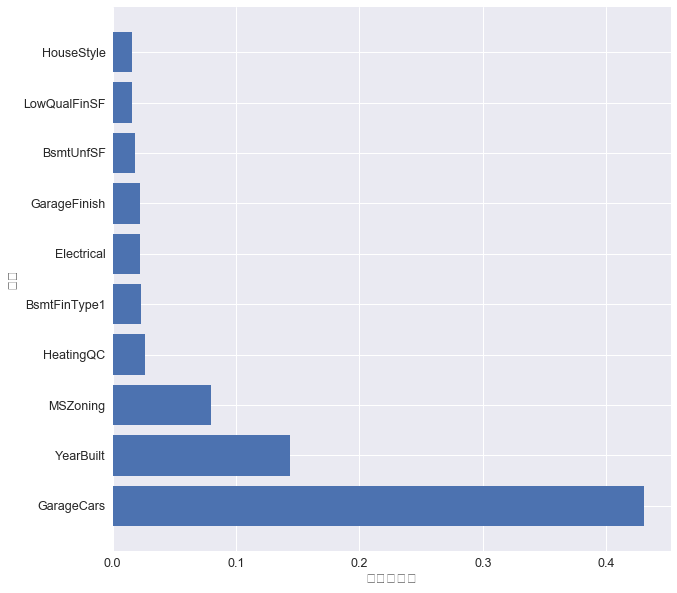

In [1073]:
# 중요도 top 10
imp = dtr.feature_importances_
top_imp=np.argsort(imp)[-10:]
fig, ax1 = plt.subplots(1,1, figsize=(10,10))
ax1.barh(range(10), imp[np.flip(top_imp,0)], align='center' )
plt.yticks(range(10),test.keys()[top_imp])
plt.xlabel("특성중요도")
plt.ylabel("특성")
plt.show()


### Stochastic Gradient Descent Regressor(SGDRegressor)

In [1074]:
from sklearn.linear_model  import SGDRegressor

sgd = SGDRegressor()

parameters_sgd = {"max_iter":[1000, 10000], "alpha":[0.00001, 0.001], "epsilon":[0.001, 0.0001]}

grid_sgd = GridSearchCV(sgd, parameters_sgd, verbose=1, scoring="r2")
grid_sgd.fit(X_training, y_training)

print("Best SGD Model: " + str(grid_sgd.best_estimator_))
print("Best Score: " + str(grid_sgd.best_score_))

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   40.5s finished


Best SGD Model: SGDRegressor(alpha=0.001, average=False, epsilon=0.001, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=10000, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)
Best Score: -1.6008589074915973e+33


In [1075]:
sgd = grid_sgd.best_estimator_
sgd.fit(X_training, y_training)
sgd_pred = sgd.predict(X_valid)
r2_sgd = r2_score(y_valid,sgd_pred)
rmse_sgd = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_sgd))
print("RMSE Score: " + str(rmse_sgd))

R^2 Score: -1.0847971344873583e+33
RMSE Score: 0.19518045612555085


In [1076]:
scores_sgd = cross_val_score(sgd, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_sgd)))

Cross Validation Score: -1.15510696533501e+35


### Random Forest Regressor Model

In [1078]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

parameters_rfr = {"n_estimators":[10, 50, 100], "min_samples_split":[2, 3, 5, 10],"max_features":["auto","sqrt","log2"], "random_state": [42] }

grid_rfr = GridSearchCV(rfr, parameters_rfr, verbose=1, scoring="r2")
grid_rfr.fit(X_training, y_training)

print("Best RFR Model: " + str(grid_rfr.best_estimator_))
print("Best Score: " + str(grid_rfr.best_score_))

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed:   34.7s finished


Best RFR Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)
Best Score: 0.8644572631536259


In [1079]:
rfr = grid_rfr.best_estimator_
rfr.fit(X_training, y_training)
rfr_pred = rfr.predict(X_valid)
r2_rfr = r2_score(y_valid,rfr_pred)
rmse_rfr = np.sqrt(mean_squared_error(y_valid, dtr_pred))
print("R^2 Score: " + str(r2_rfr))
print("RMSE Score: " + str(rmse_rfr))

R^2 Score: 0.8841688499951417
RMSE Score: 0.19518045612555085


In [1080]:
scores_rfr = cross_val_score(rfr, X_training, y_training, cv=10, scoring="r2")
print("Cross Validation Score: " + str(np.mean(scores_rfr)))

Cross Validation Score: 0.8572413666331625


### 모델 성능 평가


In [1081]:
model_performances = pd.DataFrame({"Model":["Linear Regression","Ridge","Lasso","Decision Tree Regressor","SGDRegressor","Random Forest Regressor"],
                                 "Best Score":[str(grid_linreg.best_score_)[0:5], str(grid_ridge.best_score_)[0:5], str(grid_lasso.best_score_)[0:5], str(grid_dtr.best_score_)[0:5],
                                              str(grid_sgd.best_score_)[0:5], str(grid_rfr.best_score_)[0:5]],
                                 "R^2":[str(r2_lin)[0:5], str(r2_ridge)[0:5], str(r2_lasso)[0:5], str(r2_dtr)[0:5], str(r2_sgd)[0:5], str(r2_rfr)[0:5]],
                                 "RSME":[str(rmse_lin)[0:8], str(rmse_ridge)[0:8], str(rmse_lasso)[0:8], str(rmse_dtr)[0:8], str(rmse_sgd)[0:8], str(rmse_rfr)[0:8]]})

model_performances.sort_values(by="R^2", ascending=False)

,Model,Best Score,R^2,RSME
5,Random Forest Regressor,0.864,0.884,0.195180
0,Linear Regression,0.820,0.876,0.152072
1,Ridge,0.836,0.874,0.153000
2,Lasso,0.832,0.872,0.153978
3,Decision Tree Regressor,0.753,0.795,0.195180
4,SGDRegressor,-1.60,-1.08,0.195180


### Submission

In [1083]:
import datetime

now = datetime.datetime.now()
nowDatetime = now.strftime('%Y%m%d_%H%M%S')
print(nowDatetime)  # 2015-04-19 12:11:32

submission_predictions = np.exp(rfr.predict(X_test))

submission = pd.DataFrame({
        "Id": test["Id"],
        "SalePrice": submission_predictions
    })

submission.to_csv(nowDatetime+"_SalePrices.csv", index=False)
print(submission.shape)

20190111_071048
(1459, 2)


![](이미지_20190110_155024_001.png)

## 모델 생성 오류 수정 후

#### 수정 전
rfr.fit(X_train, y_train)
#### 수정 후
rfr.fit(X_training, y_training)

![](이미지_20190111_071218_001.png)